## SAM Mask

In [106]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [107]:
sam_mask = np.load('images/movie_3/movie_3_golf_stick.npy')
sam_mask.shape

boolean_mask = sam_mask[0]
boolean_mask.shape

(960, 720)

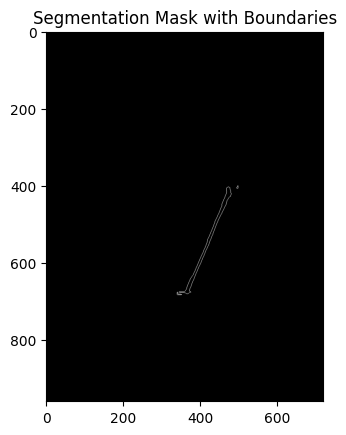

In [108]:
# Convert boolean mask to an 8-bit unsigned integer mask
int_mask = (boolean_mask * 255).astype(np.uint8)

# Convert the mask to a BGR image
bgr_mask = cv2.merge([int_mask, int_mask, int_mask])

# Convert the mask to grayscale
imgray = cv2.cvtColor(bgr_mask, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Create an empty image for drawing contours
tmp = np.zeros_like(bgr_mask)

# Draw the contours on the empty image
boundary = cv2.drawContours(tmp, contours, -1, (255, 255, 255), 1)

# Convert the boundary image to grayscale
boundary_gray = cv2.cvtColor(boundary, cv2.COLOR_BGR2GRAY)

# Set boundary pixels to 255
boundary_gray[boundary_gray > 0] = 255

# Visualize the boundary
plt.imshow(boundary_gray, cmap='gray')
plt.title('Segmentation Mask with Boundaries')
plt.show()

# Save the boundary image
plt.imsave("mask_boundary.png", boundary_gray, cmap='gray')

In [109]:
boundary_gray.shape

(960, 720)

In [110]:
type(boundary_gray)

numpy.ndarray

In [111]:
# [{'x': 325, 'y': 364, 'width': 187, 'height': 330, 'label': ''}]

# Assuming 'image' is your NumPy array representing the image

# Example top left corner and crop size
top_left_x = 325  # X coordinate of the top left corner
top_left_y = 364  # Y coordinate of the top left corner
crop_width = 187  # Width of the crop region
crop_height = 330  # Height of the crop region

# Perform the cropping operation
cropped_image = boundary_gray[top_left_y:top_left_y + crop_height, top_left_x:top_left_x + crop_width]

# Display the cropped image shape
print("Cropped image shape:", cropped_image.shape)

Cropped image shape: (330, 187)


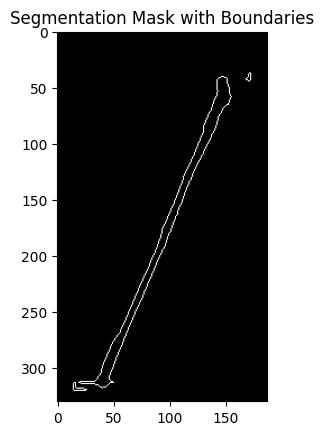

In [112]:
# Visualize the boundary
plt.imshow(cropped_image, cmap='gray')
plt.title('Segmentation Mask with Boundaries')
plt.show()

# Save the boundary image
plt.imsave("cropped_image.png", cropped_image, cmap='gray')

In [113]:
cropped_frame = cropped_image.copy()

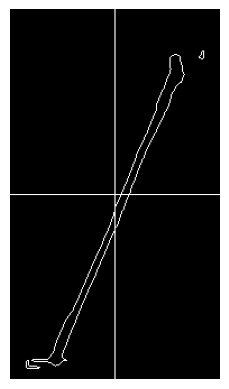

In [114]:
# Assuming 'image' is your NumPy array representing the image
# Make sure the image is in the BGR format as OpenCV uses BGR format

# Get the dimensions of the image
height, width = cropped_image.shape[:3]

# Define the color (BGR format) and thickness of the lines
color = (255, 0, 0)  # Blue color (in BGR format)
thickness = 1  # Thickness of the line

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Draw a vertical line in the middle
cv2.line(cropped_image, (mid_width, 0), (mid_width, height), color, thickness)

# Draw a horizontal line in the middle
cv2.line(cropped_image, (0, mid_height), (width, mid_height), color, thickness)

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.imsave("lines.png", cropped_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

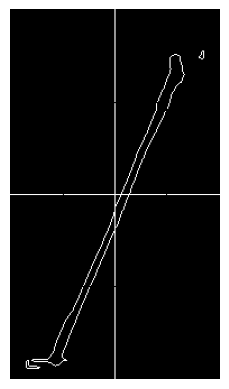

In [115]:
# Assuming 'image' is your NumPy array representing the image

# Get the dimensions of the image
height, width = cropped_image.shape[:2]

# Define the color (BGR format) and thickness of the box
color = (0, 0, 0)  # Green color (in BGR format)
thickness = 1  # Thickness of the box outline

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Calculate the top-left and bottom-right coordinates of the box
box_width = width // 2
box_height = height // 2
top_left_x = mid_width - (box_width // 2)
top_left_y = mid_height - (box_height // 2)
bottom_right_x = mid_width + (box_width // 2)
bottom_right_y = mid_height + (box_height // 2)

# Draw the rectangle (box)
cv2.rectangle(cropped_image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, thickness)

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


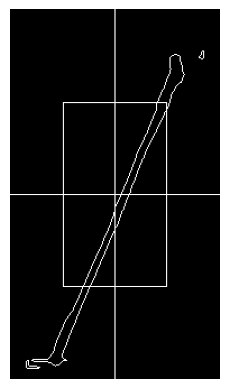

In [116]:
# Assuming 'image' is your NumPy array representing the image

# Get the dimensions of the image
height, width = cropped_image.shape[:2]

# Define the color (BGR format) and thickness of the box
color = (255, 255, 255)  # Green color (in BGR format)
thickness = 1  # Thickness of the box outline

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Calculate the top-left and bottom-right coordinates of the box
box_width = width // 2
box_height = height // 2
top_left_x = mid_width - (box_width // 2)
top_left_y = mid_height - (box_height // 2)
bottom_right_x = mid_width + (box_width // 2)
bottom_right_y = mid_height + (box_height // 2)

# Draw the rectangle (box)
cv2.rectangle(cropped_image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, thickness)

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.imsave("rectangle.png", cropped_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [117]:
plt.imsave("images/movie_3/golf_box_image.png", cropped_image, cmap='gray')

In [118]:
# Define function to check if a pixel is white
def is_white(pixel):
    return pixel == 255

# Check around the perimeter of the box for white pixels
white_pixels = []
black_pixels = []
top_edge_white_pixels = []
bottom_edge_white_pixes = []

# Top edge
for x in range(top_left_x, bottom_right_x + 1):
    if is_white(cropped_frame[top_left_y, x]):
        white_pixels.append((top_left_y, x))
        top_edge_white_pixels.append((top_left_y, x))
    else:
        black_pixels.append((top_left_y, x))

# Bottom edge
for x in range(top_left_x, bottom_right_x + 1):
    if is_white(cropped_frame[bottom_right_y, x]):
        white_pixels.append((bottom_right_y, x))
        bottom_edge_white_pixes.append((bottom_right_y, x))
    else:
        black_pixels.append((bottom_right_y, x))

# Left edge
for y in range(top_left_y, bottom_right_y + 1):
    if is_white(cropped_frame[y, top_left_x]):
        white_pixels.append((y, top_left_x))
    else:
        black_pixels.append((y, top_left_x))

# Right edge
for y in range(top_left_y, bottom_right_y + 1):
    if is_white(cropped_frame[y, bottom_right_x]):
        white_pixels.append((y, bottom_right_x))
    else:
        black_pixels.append((y, bottom_right_x))

# Display the white pixel coordinates found
print("White pixels around the perimeter of the box:", white_pixels)

# Display the resulting image using matplotlib
# plt.imshow(image, cmap='gray')
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()

White pixels around the perimeter of the box: [(83, 131), (247, 65), (247, 71), (89, 139), (90, 139)]


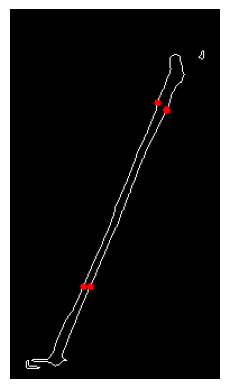

In [119]:
image_bgr = cv2.cvtColor(cropped_frame, cv2.COLOR_GRAY2BGR)

dot_color = (0, 0, 255)  # Red color for the dots (BGR format)
dot_radius = 3  # Radius of the red dots

# Draw red dots at the coordinates of the white pixels
for (y, x) in white_pixels:
    cv2.circle(image_bgr, (x, y), dot_radius, dot_color, -1)

# Convert the image to RGB format for display
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the resulting image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### 1. if there are more than 4 point cluster them into 4 points and give new coordinated, or
### 2. find the edges around the golf mask the way I did with door

In [15]:
white_pixels

[(83, 131), (247, 65), (247, 71), (89, 139), (90, 139)]

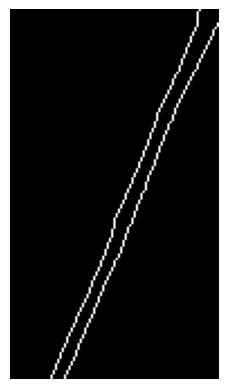

In [16]:
cropped_frame1 = cropped_frame[top_left_y:top_left_y + box_height, top_left_x:top_left_x + box_width]

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_frame1, cv2.COLOR_BGR2RGB))
# plt.imsave("rectangle.png", cropped_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### find the edges around the segmentations mask

In [25]:
sam_mask = np.load('images/movie_3/movie_3_golf_stick.npy')
sam_mask.shape

boolean_mask = sam_mask[0]
boolean_mask.shape

(960, 720)

In [26]:
# Example top left corner and crop size
top_left_x = 325  # X coordinate of the top left corner
top_left_y = 364  # Y coordinate of the top left corner
crop_width = 187  # Width of the crop region
crop_height = 330  # Height of the crop region

# Perform the cropping operation
cropped_image = boolean_mask[top_left_y:top_left_y + crop_height, top_left_x:top_left_x + crop_width]

In [27]:
# Get the dimensions of the image
height, width = cropped_image.shape[:2]

# Define the color (BGR format) and thickness of the box
color = (255, 255, 255)  # Green color (in BGR format)
thickness = 2  # Thickness of the box outline

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Calculate the top-left and bottom-right coordinates of the box
box_width = width // 2
box_height = height // 2
top_left_x = mid_width - (box_width // 2)
top_left_y = mid_height - (box_height // 2)

cropped_frame1 = cropped_image[top_left_y:top_left_y + box_height, top_left_x:top_left_x + box_width]

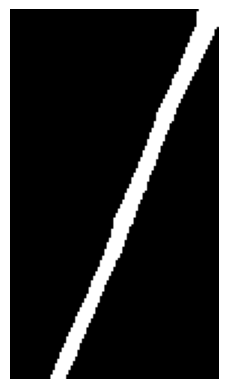

In [31]:
plt.imshow(cropped_frame1, cmap='gray')
# plt.imsave("rectangle.png", cropped_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [32]:
# Convert boolean mask to an 8-bit unsigned integer mask
int_mask = (cropped_frame1 * 255).astype(np.uint8)

# Convert the mask to a BGR image
bgr_mask = cv2.merge([int_mask, int_mask, int_mask])

# Convert the mask to grayscale
imgray = cv2.cvtColor(bgr_mask, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

In [33]:
# Step 1: Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Ensure there are contours found
if len(contours) == 0:
    raise ValueError("No contours found in the mask.")

In [34]:
len(contours)

1

In [35]:
min_area_rects = [cv2.minAreaRect(contour) for contour in contours]
box_points = [np.intp(cv2.boxPoints(min_area_rect)) for min_area_rect in min_area_rects]

In [47]:
import os 
dir_path = "images/movie_3/golf_contours"
os.makedirs(dir_path, exist_ok=True)

count = 0
for box_point in box_points:
    # get bounding box image
    bounding_box = cv2.drawContours(cv2.cvtColor(thresh.copy(), cv2.COLOR_GRAY2BGR), [box_point], 0, (0, 255, 0), 2)  # Color set to green (BGR format)

    # golf_bbox = cv2.rectangle(bounding_box, (top_left_x, top_left_y), (top_left_x+crop_width, top_left_y+crop_height), (0,0,255), 2)

    # plot and save the image
    plt.imsave(f"{dir_path}/contour_{count}.png", bounding_box)

    count += 1

In [48]:
# (top-left, top-right, bottom-right, bottom-left)
box_points

[array([[ 17, 163],
        [ 84,  -2],
        [ 94,   0],
        [ 27, 167]])]

In [49]:
box_points[0]

array([[ 17, 163],
       [ 84,  -2],
       [ 94,   0],
       [ 27, 167]])

In [56]:
top_left = box_points[0][0]
top_right = box_points[0][1]
bottom_right = box_points[0][2] 
bottom_left = box_points[0][3]

In [50]:
bounding_box.shape

(165, 93, 3)

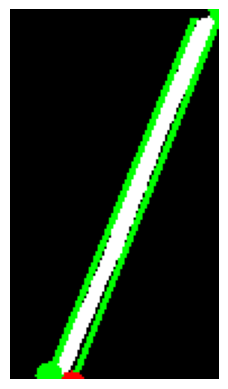

In [85]:
# image_bgr = cv2.cvtColor(bounding_box, cv2.COLOR_GRAY2BGR)

dot_color = (0, 255, 0)  # Red color for the dots (BGR format)
dot_radius = 6  # Radius of the red dots

# Draw red dots at the coordinates of the white pixels
# for (x, y) in box_points[0]:
cv2.circle(bounding_box, (box_points[0][2][0], box_points[0][2][1]), dot_radius, dot_color, -1)

# Convert the image to RGB format for display
image_rgb = cv2.cvtColor(bounding_box, cv2.COLOR_BGR2RGB)

# Display the resulting image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [86]:
box_points[0][0][0]

17

In [90]:
line1 = [box_points[0][1], box_points[0][0]]
h_line1 = [box_points[0][0], (box_points[0][0][0]+60,box_points[0][0][1])]

line2 = [box_points[0][1], box_points[0][2]]
h_line2 = [(0,0), (100,0)]

In [91]:
# calculate angle 
# line1: p1, p3
# line2: p2, p4 
# 3rd point: 0, p_3[0]

import math 

def get_angle(line1, line2):
    """get angle between two lines represented by points in degrees"""
    # Get directional vectors
    d1 = (line1[1][0] - line1[0][0], line1[1][1] - line1[0][1])
    d2 = (line2[1][0] - line2[0][0], line2[1][1] - line2[0][1])
    # Compute dot product
    p = d1[0] * d2[0] + d1[1] * d2[1]
    # Compute norms
    n1 = math.sqrt(d1[0] * d1[0] + d1[1] * d1[1])
    n2 = math.sqrt(d2[0] * d2[0] + d2[1] * d2[1])
    # Compute angle
    try:
        ang = math.acos(p / (n1*n2))
    except:
        ang = 0
    # Convert to degrees if you want
    ang = math.degrees(ang)
    return ang

In [92]:
ang1 = get_angle(line1, h_line1)
ang1

112.10013347153443

## Previous work with key points

In [19]:
# TODO: the criteria for calculating the top edge pixels and bottom edge pixels need to be changed, instead of using top edge and bottom edge, use middle line, and instead of assuming 4 points, check if there are more than 4 point and do clustering
top_edge_white_pixels = [(83, 131),(89, 139)]
top_edge_white_pixels

[(83, 131), (89, 139)]

### 2. Take the cropped region and find the edges around the contour 

In [20]:
white_pixels = [(83, 131), (247, 65), (247, 71), (89, 139)]

In [21]:
len(white_pixels), len(black_pixels)

(4, 511)

In [22]:
cropped_image.shape

(330, 187)

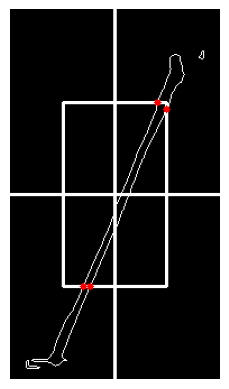

In [23]:
image_bgr = cv2.cvtColor(cropped_image, cv2.COLOR_GRAY2BGR)

dot_color = (0, 0, 255)  # Red color for the dots (BGR format)
dot_radius = 3  # Radius of the red dots

# Draw red dots at the coordinates of the white pixels
for (y, x) in white_pixels:
    cv2.circle(image_bgr, (x, y), dot_radius, dot_color, -1)

# Convert the image to RGB format for display
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the resulting image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [24]:
plt.imsave("images/movie_3/golf_box_pixels.png", image_rgb)

In [26]:
if top_edge_white_pixels[0][1] < top_edge_white_pixels[1][1]:
    pt_1 = top_edge_white_pixels[0]
    pt_2 = top_edge_white_pixels[1]
else:
    pt_1 = top_edge_white_pixels[1]
    pt_2 = top_edge_white_pixels[0] 

In [22]:
bottom_edge_white_pixes

[(247, 65), (247, 71)]

In [27]:
if bottom_edge_white_pixes[0][1] < bottom_edge_white_pixes[1][1]:
    pt_3 = bottom_edge_white_pixes[0]
    pt_4 = bottom_edge_white_pixes[1]
else:
    pt_3 = bottom_edge_white_pixes[1]
    pt_4 = bottom_edge_white_pixes[0]

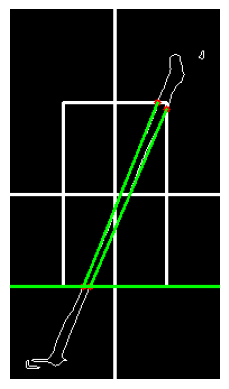

In [28]:
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# golf stick lines
cv2.line(image_bgr, (pt_1[1], pt_1[0]), (pt_3[1], pt_3[0]), color=(0,255,0), thickness=2)
cv2.line(image_bgr, (pt_2[1], pt_2[0]), (pt_4[1], pt_4[0]), color=(0,255,0), thickness=2)

# horizontal line on the image
cv2.line(image_bgr, (0, pt_3[0]), (crop_width-1, pt_3[0]), color=(0,255,0), thickness=2)

# Convert the image to RGB format for display
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the resulting image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [29]:
plt.imsave("images/movie_3/box_pixels.png", image_rgb)

In [30]:
image_rgb.shape

(330, 187, 3)

In [59]:
# calculate angle 
# line1: p1, p3
# line2: p2, p4 
# 3rd point: 0, p_3[0]

import math 

def get_angle(line1, line2):
    """get angle between two lines represented by points in degrees"""
    # Get directional vectors
    d1 = (line1[1][0] - line1[0][0], line1[1][1] - line1[0][1])
    d2 = (line2[1][0] - line2[0][0], line2[1][1] - line2[0][1])
    # Compute dot product
    p = d1[0] * d2[0] + d1[1] * d2[1]
    # Compute norms
    n1 = math.sqrt(d1[0] * d1[0] + d1[1] * d1[1])
    n2 = math.sqrt(d2[0] * d2[0] + d2[1] * d2[1])
    # Compute angle
    try:
        ang = math.acos(p / (n1*n2))
    except:
        ang = 0
    # Convert to degrees if you want
    ang = math.degrees(ang)
    return ang

In [32]:
line1 = [(pt_1[1],pt_1[0]), (pt_3[1], pt_3[0])]
h_line1 = [(pt_3[1], pt_3[0]), (crop_width-1, pt_3[0])]

line2 = [(pt_2[1],pt_2[0]), (pt_4[1], pt_4[0])]
h_line2 = [(pt_4[1], pt_4[0]), (crop_width-1, pt_3[0])]

In [33]:
ang1 = get_angle(line1, h_line1)
ang1

111.92177859395915

In [34]:
ang2 = get_angle(line2, h_line2)
ang2

113.28606491822356

In [35]:
180 - ang2

66.71393508177644